In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
import matplotlib.pyplot as plt
import xgboost as xgb


In [4]:
random_state = 1

In [ ]:
## download dataset, to do this you have do:

# pipenv install ucimlrepo
# from ucimlrepo import fetch_ucirepo 
# adult = fetch_ucirepo(id=2)

## data (as pandas dataframes) 
#df = adult.data.features 
#df['y'] = adult.data.targets 


# coment this line, if you are going to download dataset
df = pd.read_csv('adult_income.csv')


Data preparation

In [10]:
df.columns = df.columns.str.lower().str.replace('-', '_')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head().T

,0,1,2,3,4
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
education_num,13,13,9,7,13
marital_status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female


In [11]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
categorical = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
numerical = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
y                 object
dtype: object

Remowing "Nan"

In [13]:
#removing Nan
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
y                   0
dtype: int64

In [14]:
df = df.fillna("")
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
y                 0
dtype: int64

In [15]:
#removin "?"
(df == "?").sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
y                    0
dtype: int64

In [16]:
df.workclass = df.workclass.replace('?', '')
df.occupation = df.occupation.replace('?', '')
df.native_country = df.native_country.replace('?', '')

In [17]:
#To remember that we have "" in databese
(df == "").sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
y                    0
dtype: int64

In [18]:
#Cheching all unique values to find if any incorrect data
df["y"].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [19]:
# change y to 1/0 values instead of '<=50K', '>50K', '<=50K.', '>50K.'
df['y']  = ((df['y'] == '>50K') | (df['y'] == '>50K.')).astype(int)

In [20]:
#split data for 3 parts for training, validation and testing

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=random_state)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=random_state)
assert len(df) == (len(df_train) + len(df_val) + len(df_test))

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

Features importance analysis

In [22]:
from sklearn.metrics import mutual_info_score

In [23]:
def calculate_mi(series):
    return mutual_info_score(series, df_full_train.y)

df_mi = df_full_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi)

,MI
relationship,0.115914
marital_status,0.110592
occupation,0.063968
education,0.062471
sex,0.026051
workclass,0.015183
race,0.005739
native_country,0.005668


In [24]:
a = df_full_train[numerical].corrwith(df_full_train.y).to_frame('correlation')
a.sort_values('correlation', ascending=False)

#this shows that education IS important!


,correlation
education_num,0.329396
hours_per_week,0.228607
age,0.226706
capital_gain,0.224067
capital_loss,0.141049
fnlwgt,-0.007804


In [25]:
global_mean = df.y.mean()
round(global_mean, 3)

np.float64(0.239)

In [26]:
for col in categorical:
    df_group = df_full_train.groupby(by=col).y.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['chance'] = df_group['mean'] / global_mean
    df_group = df_group.sort_values('chance', ascending=False)
    display(df_group.head())

,mean,diff,chance
workclass,,,
Self-emp-inc,0.546131,0.306849,2.282376
Federal-gov,0.391808,0.152526,1.637432
Local-gov,0.297966,0.058684,1.245250
Self-emp-not-inc,0.277687,0.038405,1.160502
State-gov,0.271746,0.032464,1.135674


,mean,diff,chance
education,,,
Prof-school,0.722892,0.483610,3.021089
Doctorate,0.722222,0.482940,3.018292
Masters,0.546912,0.307630,2.285639
Bachelors,0.413523,0.174241,1.728185
Assoc-voc,0.259170,0.019888,1.083117


,mean,diff,chance
marital_status,,,
Married-civ-spouse,0.448612,0.209331,1.874829
Married-AF-spouse,0.321429,0.082147,1.343306
Divorced,0.100796,-0.138486,0.421243
Married-spouse-absent,0.091633,-0.147648,0.382952
Widowed,0.080257,-0.159025,0.335407


,mean,diff,chance
occupation,,,
Exec-managerial,0.477646,0.238364,1.996164
Prof-specialty,0.447617,0.208335,1.870670
Protective-serv,0.321019,0.081737,1.341595
Armed-Forces,0.307692,0.068411,1.285900
Tech-support,0.297966,0.058685,1.245253


,mean,diff,chance
relationship,,,
Wife,0.461249,0.221967,1.927638
Husband,0.451874,0.212592,1.888458
Not-in-family,0.100187,-0.139095,0.418697
Unmarried,0.057806,-0.181475,0.241583
Other-relative,0.037221,-0.202061,0.155552


,mean,diff,chance
race,,,
Asian-Pac-Islander,0.269263,0.029981,1.125295
White,0.254040,0.014759,1.061679
Amer-Indian-Eskimo,0.122016,-0.117266,0.509926
Black,0.120107,-0.119175,0.501946
Other,0.118012,-0.121269,0.493194


,mean,diff,chance
sex,,,
Male,0.304564,0.065283,1.272828
Female,0.107935,-0.131346,0.451080


,mean,diff,chance
native_country,,,
India,0.424000,0.184718,1.771970
Yugoslavia,0.388889,0.149607,1.625234
Iran,0.375000,0.135718,1.567190
Cambodia,0.360000,0.120718,1.504502
France,0.357143,0.117861,1.492562


Data is ready for training model

In [27]:
#VECTORIZING DATA
dv = DictVectorizer(sparse=True)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

Training logistic regression

In [28]:
model = LogisticRegression(solver='liblinear', random_state=random_state)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [29]:
y_pred = model.predict_proba(X_val)[:, 1]

In [30]:
has_50k = y_pred > 0.5
(y_val == has_50k).mean()
#calculating accurancy on validation set

np.float64(0.7956802129184154)

In [31]:
#Calculating AUC, to see how bad is this model.
round(roc_auc_score(y_val, y_pred),3)

np.float64(0.595)

Training Design Tree model

In [32]:
#I am going to tune max_depth immediately along the way

depths = [1, 2, 5, 10, 11, 12, 13, 14, 15, 20, 30, 50]

In [33]:
scores = []
for d in depths:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_val)
    auc_score = round(roc_auc_score(y_val, y_pred),3)
    scores.append((d, auc_score))
scores = pd.DataFrame(scores, columns=["max_depth", "AUC"])


In [34]:
scores
# here I can see that max_depth of 11-14 gives the best AUC.
# ~0.771 This model is better then logistic regression

,max_depth,AUC
0,1,0.500
1,2,0.714
2,5,0.754
3,10,0.764
4,11,0.771
5,12,0.770
6,13,0.772
7,14,0.769
8,15,0.765
9,20,0.755


Training Random Forest Model

In [35]:
n_estimators=10

dforest = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state, n_jobs=-1)
dforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1)

In [36]:
y_pred = dforest.predict(X_val)
round(roc_auc_score(y_val, y_pred),3)
# model with no parametres tuning gives worse AUC, so let's tune!

np.float64(0.758)

In [37]:
#tune for n_estimators
scores = []

for n in range(10, 101, 10):
    dforest = RandomForestClassifier(n_estimators=n, random_state=random_state, n_jobs=-1)
    dforest.fit(X_train, y_train)

    y_pred = dforest.predict(X_val)
    auc_score = round(roc_auc_score(y_val, y_pred),3)
    scores.append((n, auc_score))
scores = pd.DataFrame(scores, columns=["n_estimators", "AUC"])

In [38]:
scores

,n_estimators,AUC
0,10,0.758
1,20,0.768
2,30,0.774
3,40,0.775
4,50,0.777
5,60,0.776
6,70,0.777
7,80,0.780
8,90,0.780
9,100,0.779


In [39]:
# this cell will took some time to run ~2 mins at my PC
scores = []
for n in range(20, 91, 10):
    print("n = ", n)
    for depth in [5, 10, 15, 20, 25, 30, 40]:
        dforest = RandomForestClassifier(max_depth=depth, n_estimators=n, random_state=random_state, n_jobs=-1)
        dforest.fit(X_train, y_train)

        y_pred = dforest.predict(X_val)
        auc_score = round(roc_auc_score(y_val, y_pred),3)
        scores.append((n, depth, auc_score))
scores = pd.DataFrame(scores, columns=["n_estimators", 'max_depth', "AUC"])

n =  20
n =  30
n =  40
n =  50
n =  60
n =  70
n =  80
n =  90


In [40]:
print("Max AUC = ", scores["AUC"].max())
scores.pivot_table(index="n_estimators", columns="max_depth", values="AUC")
#it looks like the best estimations are at max depth = 30, n_estimators 30-90. Lets chose 70.


Max AUC =  0.784


max_depth,5,10,15,20,25,30,40
n_estimators,,,,,,,
20,0.699,0.744,0.760,0.774,0.776,0.777,0.775
30,0.698,0.750,0.760,0.775,0.776,0.781,0.777
40,0.688,0.750,0.762,0.775,0.777,0.783,0.779
50,0.701,0.751,0.764,0.776,0.779,0.780,0.778
60,0.699,0.752,0.764,0.774,0.778,0.784,0.778
70,0.699,0.752,0.765,0.776,0.779,0.782,0.777
80,0.698,0.752,0.765,0.775,0.779,0.783,0.780
90,0.697,0.753,0.765,0.775,0.778,0.784,0.778


In [41]:
#Tuning the min_samples_leaf parameter
scores = []

for m in [1, 2, 3, 5, 10]:
    dforest = RandomForestClassifier(min_samples_leaf = m,  n_estimators=70, max_depth=30, random_state=random_state, n_jobs=-1)
    dforest.fit(X_train, y_train)

    y_pred = dforest.predict(X_val)
    auc_score = round(roc_auc_score(y_val, y_pred),3)
    scores.append((m, auc_score))
scores = pd.DataFrame(scores, columns=["min_samples_leaf", "AUC"])

In [42]:
scores

,min_samples_leaf,AUC
0,1,0.782
1,2,0.782
2,3,0.776
3,5,0.777
4,10,0.772


In [43]:
# this tesst was made just to be shure that I did not miss some possibility with greater AUC in some other parameter combination.
# but it shows that that one really was oprimal. Running this cell will take some time (about 2min at my PC)
scores = []
for n in range(30, 71, 10):
    print("n = ", n)
    for depth in [15, 20, 25, 30, 40]:
        for m in [1, 2, 5]:
            dforest = RandomForestClassifier(min_samples_leaf = m, max_depth=depth, n_estimators=n, random_state=random_state, n_jobs=-1)
            dforest.fit(X_train, y_train)

            y_pred = dforest.predict(X_val)
            auc_score = round(roc_auc_score(y_val, y_pred),3)
            scores.append((m, n, depth, auc_score))
scores = pd.DataFrame(scores, columns=["min_samples_leaf", "n_estimators", 'max_depth', "AUC"])

n =  30
n =  40
n =  50
n =  60
n =  70


In [44]:
print("Max AUC = ", scores["AUC"].max())
scores[scores["AUC"]>0.78]

Max AUC =  0.784


,min_samples_leaf,n_estimators,max_depth,AUC
9,1,30,30,0.781
22,2,40,25,0.781
24,1,40,30,0.783
25,2,40,30,0.782
40,2,50,30,0.781
54,1,60,30,0.784
55,2,60,30,0.782
69,1,70,30,0.782
70,2,70,30,0.782


In [45]:
#final parameters for Random Forest Model. AUC = 0.782 

min_samples_leaf = 1
max_depth=30
n_estimators=60

Train XGBoost model

In [46]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [47]:
scores=[]

watchlist = [(dtrain, 'train'), (dval, 'val')]

In [48]:
%%capture output

eta=0.1

xgb_params = {
    'eta': eta, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals = watchlist, num_boost_round=130)

In [49]:
y_pred = model.predict(dval)

In [50]:
auc_score = round(roc_auc_score(y_val, y_pred),3)
scores.append((eta, auc_score))
scores

[(0.1, np.float64(0.933))]

In [51]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.split('\n')[0:-1]:
        it_line, train_line, val_line = line.split('\t')
        it = int(it_line.strip("[]"))
        train = float(train_line.split(":")[1])
        val = float(val_line.split(":")[1])
        results.append((it, train, val))
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [52]:
df_scores = parse_xgb_output(output)

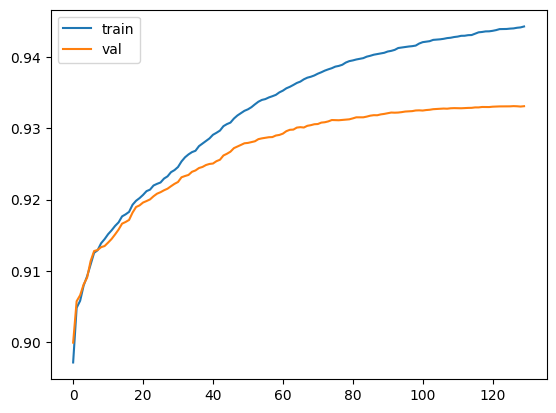

In [53]:
plt.plot(df_scores.num_iter, df_scores.train_auc, label = "train")
plt.plot(df_scores.num_iter, df_scores.val_auc, label = "val")
plt.legend()

In [54]:
scores=[]

eta=0.1

for depth in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for min_ch in [1, 2, 3, 5, 10]:
        xgb_params = {
            'eta': eta, 
            'max_depth': depth,
            'min_child_weight': min_ch,
            
            'objective': 'binary:logistic',
            'eval_metric': 'auc',
            'nthread': 8,
            
            'seed': 1,
            'verbosity': 1,
        }

        model = xgb.train(xgb_params, dtrain, num_boost_round=130) #evals = watchlist, 
        y_pred = model.predict(dval)
        auc_score = round(roc_auc_score(y_val, y_pred),3)
        scores.append((depth, min_ch, auc_score))
scores = pd.DataFrame(scores, columns=['max_depth', 'min_child_weight', "AUC"])


In [55]:
print("Max AUC = ", scores["AUC"].max())
scores.pivot_table(index="min_child_weight", columns="max_depth", values="AUC")
# it looks like standart parameters of max_depth = 6 and min_child_weight = 1 are OK.
# AUC shown by this model is significantly better then any previous. 

Max AUC =  0.933


max_depth,2,3,4,5,6,7,8,9,10
min_child_weight,,,,,,,,,
1,0.921,0.928,0.930,0.933,0.933,0.933,0.933,0.932,0.930
2,0.921,0.927,0.931,0.932,0.933,0.932,0.932,0.931,0.930
3,0.921,0.928,0.931,0.932,0.932,0.933,0.932,0.931,0.931
5,0.921,0.927,0.930,0.932,0.932,0.932,0.931,0.931,0.930
10,0.921,0.927,0.930,0.931,0.931,0.931,0.931,0.931,0.931


Training Final Model

In [56]:
y_full_train = df_full_train.y.values
del df_full_train['y']

In [57]:
full_train_dict = df_full_train.to_dict(orient='records')
X_full_train = dv.fit_transform(full_train_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [58]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [59]:
watchlist = [(dtrain, 'train'), (dtest, 'test')]

In [ ]:
eta=0.1
max_depth = 6
min_child_weight = 1
num_boost_round = 130

xgb_params = {
    'eta': eta, 
    'max_depth': max_depth,
    'min_child_weight': min_child_weight,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals = watchlist, num_boost_round=num_boost_round)

[0]	train-auc:0.89898	test-auc:0.89411
[1]	train-auc:0.90508	test-auc:0.90061
[2]	train-auc:0.90754	test-auc:0.90289
[3]	train-auc:0.90781	test-auc:0.90414
[4]	train-auc:0.90926	test-auc:0.90503
[5]	train-auc:0.91158	test-auc:0.90825
[6]	train-auc:0.91229	test-auc:0.90867
[7]	train-auc:0.91270	test-auc:0.90910
[8]	train-auc:0.91364	test-auc:0.90973
[9]	train-auc:0.91438	test-auc:0.91024
[10]	train-auc:0.91514	test-auc:0.91110
[11]	train-auc:0.91535	test-auc:0.91107
[12]	train-auc:0.91622	test-auc:0.91162
[13]	train-auc:0.91694	test-auc:0.91205
[14]	train-auc:0.91747	test-auc:0.91252
[15]	train-auc:0.91816	test-auc:0.91319
[16]	train-auc:0.91859	test-auc:0.91354
[17]	train-auc:0.91938	test-auc:0.91408
[18]	train-auc:0.91968	test-auc:0.91405
[19]	train-auc:0.92009	test-auc:0.91429
[20]	train-auc:0.92061	test-auc:0.91459
[21]	train-auc:0.92105	test-auc:0.91481
[22]	train-auc:0.92129	test-auc:0.91492
[23]	train-auc:0.92157	test-auc:0.91516
[24]	train-auc:0.92214	test-auc:0.91574
[25]	train

In [75]:
df_test.iloc[0].to_dict()

{'age': 27,
 'workclass': 'Private',
 'fnlwgt': 301302,
 'education': 'Bachelors',
 'education_num': 13,
 'marital_status': 'Never-married',
 'occupation': 'Craft-repair',
 'relationship': 'Not-in-family',
 'race': 'White',
 'sex': 'Male',
 'capital_gain': 0,
 'capital_loss': 0,
 'hours_per_week': 50,
 'native_country': 'United-States'}